# Coronavirus articles

En esta notebook mostraremos algunos 

In [52]:
%load_ext autoreload
%autoreload 2
from mongoengine import connect
from tweepyrate import create_apps
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")

db = client["hatespeech-news"]

print(f"Tenemos {Article.objects.count()} artículos")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tenemos 86606 artículos


In [2]:
Article.objects[0].comments[0].created_at

datetime.datetime(2020, 2, 10, 23, 42, 28)

Busquemos artículos con:

* 10 comentarios al menos
* Con al menos un comentario marcado como odioso
* Que hable de Coronavirus

In [6]:
Article.objects.distinct('user')

['LANACION',
 'LaVanguardia',
 'abc_es',
 'clarincom',
 'cronica',
 'elmundoes',
 'elpaisuy',
 'infobae',
 'izquierdadiario',
 'laderechadiario',
 'latercera',
 'pagina12',
 'perfilcom']

In [94]:
initial_query = {
    "user__in": ["LANACION", "clarincom", "cronica", "infobae", "perfilcom"]
    #comments__10__exists": True,
    #"comments__hateful_value__gt": 0.5
}

covid_terminos = [
    "coronavirus", "covid-19", "covid", "cuarentena", "virus", 
    "normalidad", "aislamiento", "padecimiento", "virus", "encierro", 
    "fase", "infectados", "Wuhan", "distanciamiento", "salud", "fiebre", "síntomas", "ASPO"
]

dengue_terminos = [
    "dengue", "aedes", "mosquito", "descacharrar",
    "cacharro",
]

terminos = covid_terminos + dengue_terminos

print(f"Cantidad de artículos sin filtro por palabras: {Article.objects(**initial_query).count()}")


articles = Article.objects(**initial_query).search_text('Coronavirus')
print(articles.count())

Cantidad de artículos sin filtro por palabras: 48439


KeyboardInterrupt: 

In [15]:
Y = [Article.objects(**initial_query).search_text(" ".join(covid_terminos[:i])).count() 
     for i in range(1, len(covid_terminos)+1)]

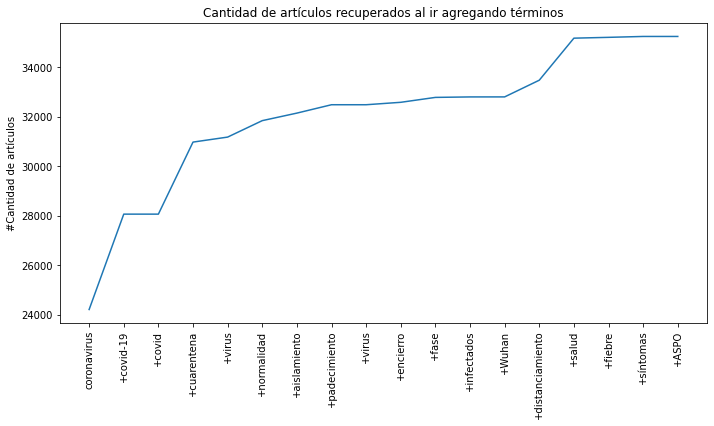

In [77]:
import matplotlib.pyplot as plt

ticks = covid_terminos.copy()
for i in range(1, len(ticks)):
    ticks[i] = f"+{ticks[i]}"

plt.figure(figsize=(10, 6))

X = list(range(len(ticks)))
plt.plot(X, Y)

plt.ylabel("#Cantidad de artículos")
plt.xticks(X, ticks, rotation=90);

plt.title("Cantidad de artículos recuperados al ir agregando términos")

plt.tight_layout(pad=1.0)
plt.savefig("articulos-termino.png")


- No hay ninguna nota que mencione cuarentena y no mencione Coronavirus o COVID-19
- Hay casi 2k notas que hablan de "Virus" y no de Coronavirus y COVID-19
- 102 que hablan de "normalidad

Hay sólo dos palabras raras:

- Cuarentena, y salud

## Cuarentena

In [78]:
for article in db.article.find({
    "user": {"$in": ["LANACION", "clarincom", "cronica", "infobae", "perfilcom"]},
    "$text": { "$search": "cuarentena -covid-19 -coronavirus"}
}):
    print("--")
    print(article["created_at"])
    
    print(f"{article['user']} -- {article['title']}")
    print(f"{len(article['comments'])} comentarios")

--
2020-03-28 23:05:04
cronica -- Así es el trámite onlineTrámite online para poder transitar por las calles durante la cuarentena para obtener el permiso de circulación durante la cuarentena
1 comentarios
--
2020-03-27 16:30:11
cronica -- Así es el trámite onlineTrámite online para poder transitar por las calles durante la cuarentena para obtener el permiso de circulación durante la cuarentena
1 comentarios
--
2020-03-25 02:05:05
cronica -- Así es el trámite onlineTrámite online para poder transitar por las calles durante la cuarentena para obtener el permiso de circulación durante la cuarentena
1 comentarios
--
2020-06-07 14:42:42
perfilcom -- Claroscuros de cuarentena
8 comentarios
--
2020-04-11 18:46:41
infobae -- Los cuentos de Facundo Arana: “Una historia de cuarentena”
3 comentarios
--
2020-04-28 08:30:18
cronica -- Empleadas domésticas: todo lo que tenés que saber durante la cuarentena
2 comentarios
--
2020-06-05 14:28:47
clarincom -- Creció la adopción de mascotas durante la c

## Salud

In [90]:
db.article.find({
    "user": {"$in": ["LANACION", "clarincom", "cronica", "infobae", "perfilcom"]},
    "$text": { "$search": "salud -covid-19 -coronavirus -cuarentena"}
}, {"html": 0}).count()

/home/jmperez/.local/share/virtualenvs/hatespeech-collection-qaK7Gomm/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


2258

In [91]:
for article in db.article.find({
    "user": {"$in": ["LANACION", "clarincom", "cronica", "infobae", "perfilcom"]},
    "$text": { "$search": "salud -covid-19 -coronavirus -cuarentena"}
}, {"html": 0}):
    print("--")
    print(article["created_at"])
    print(article["url"])
    print(f"{article['user']} -- {article['title']}")
    print(f"{len(article['comments'])} comentarios")


--
2020-05-28 13:36:21
https://www.infobae.com/opinion/2020/05/28/la-salud-menstrual-como-expresion-de-desigualdad/?utm_medium=Echobox&utm_source=Twitter#Echobox=1590666215
infobae -- La salud menstrual como expresión de desigualdad
10 comentarios
--
2020-02-21 16:45:44
https://www.clarin.com/buena-vida/10-habitos-atentan-salud-ojos_0_xy5ewouh.html?utm_medium=Social&utm_source=Twitter#Echobox=1582303358
clarincom -- 10 hábitos que atentan contra la salud de tus ojos
2 comentarios
--
2020-02-12 12:39:42
https://www.clarin.com/buena-vida/bajar-panza-cuestion-salud-reducir-grasa-abdominal_0_KiOaHPfo.html?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1581507003
clarincom -- Bajar la panza, una cuestión de salud: cómo reducir la grasa abdominal
1 comentarios
--
2020-03-03 10:24:00
http://bit.ly/3akXyN9
infobae -- Según la ciencia, tener mascotas tendría sorprendentes beneficios para la salud
2 comentarios
--
2020-03-01 13:30:38
http://bit.ly/2PA36v6
infobae -- El dentista d

## Dengue

In [112]:
nuevos_terminos = ["dengue", "aedes", "cacharro", "descacharrar"]

In [113]:
Y = [Article.objects(**initial_query).search_text(" ".join(nuevos_terminos[:i])).count() 
     for i in range(1, len(nuevos_terminos)+1)]

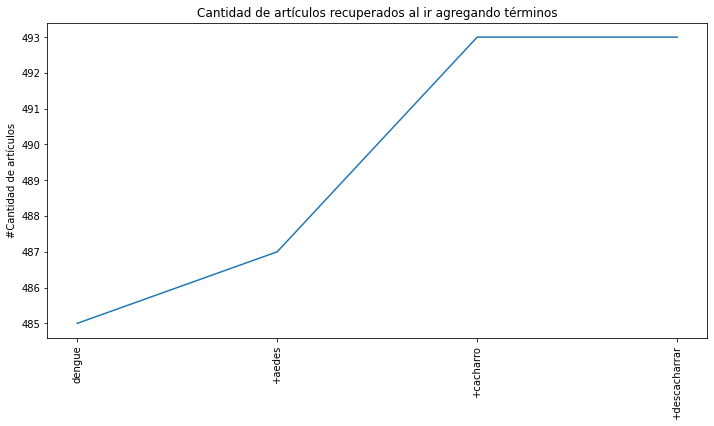

In [115]:
import matplotlib.pyplot as plt

ticks = nuevos_terminos.copy()
for i in range(1, len(ticks)):
    ticks[i] = f"+{ticks[i]}"

plt.figure(figsize=(10, 6))

X = list(range(len(ticks)))
plt.plot(X, Y)

plt.ylabel("#Cantidad de artículos")
plt.xticks(X, ticks, rotation=90);

plt.title("Cantidad de artículos recuperados al ir agregando términos")

plt.tight_layout(pad=1.0)
plt.savefig("articulos-termino-dengue.png")


In [111]:
articles = Article.objects(**initial_query).search_text("mosquito -dengue -coronavirus")

print(articles.count())

for art in articles:
    print("="*80+'\n\n')
    print(art.created_at)
    print(art.url)
    print(art)

22


2020-02-27 12:11:34
http://dlvr.it/RQrcWR
1233001726409494528 - LANACION
Por qué los mosquitos nos pican más en los tobillos

(2 comentarios)
Tweet:
Por qué los mosquitos nos pican más en los tobillos https://t.co/f5FapP3noc https://t.co/mmtXoIg2an
    


2020-02-18 10:02:52
https://ibae.am/2SUAHkw
1229707846889037824 - infobae
La ANMAT informó el retiro preventivo del mercado de insecticidas contra los mosquitos

(11 comentarios)
Tweet:
La ANMAT recomendó retirar del mercado unos insecticidas contra mosquitos https://t.co/dJWI1TOfUo
    


2020-04-07 17:33:42
https://www.clarin.com/viajes/ciudad-mayor-colonia-urbana-murcielagos-gran-espectaculo-turistico_0_reptdYAS2.html?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1586280003
1247578311242518529 - clarincom
Esta ciudad tiene la mayor colonia urbana de murciélagos y es un gran espectáculo turístico

(5 comentarios)
Tweet:
Esta ciudad tiene la mayor colonia urbana de murciélagos y es un gran espectáculo turístico 